In [1]:
from sys import path
path.append('./include/')
import networkx as nx
import matplotlib.pyplot as plt
from graphviz import Graph
import include.Node as Node
import include.C2_utils as c2u

### Tree generation
$\ell$ can only take values ranging from 1 to height-1 as is defined (level enumeration starts from 0).

In [20]:
levs=5  # levels of the tree
ell_ensemble = []

for ell in range(1,levs):
    ell_ensemble.append( c2u.CommandGeneration(levs=levs, ell=ell) )  # an ensemble of different ell.
    # Each tree has been generated 100 times in ell_ensmble for averaging purposes of the random walker
    # in the postprocessing.

In [25]:
Sample = ell_ensemble[-1][0]

### Simple matplotlib representation

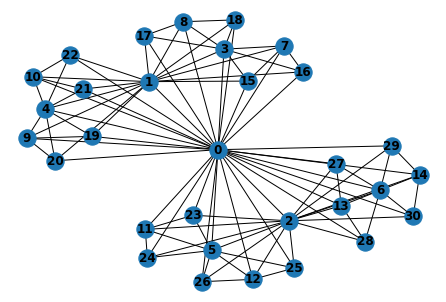

In [26]:
nx.draw(Sample, with_labels=True, font_weight='bold')

### Employing Graphviz to visualize the tree (change $\ell$ in its generation for different graphs)

In [27]:
dotinit = Graph(comment='Initial Structure')

for i in Sample.nodes():
    dotinit.node(str(Sample.nodes[i]['ID']), 'x' + str(Sample.nodes[i]['ID']))

for i in Sample.edges():
    dotinit.edge( str(i[0]),  str(i[1]), constraint='true' )

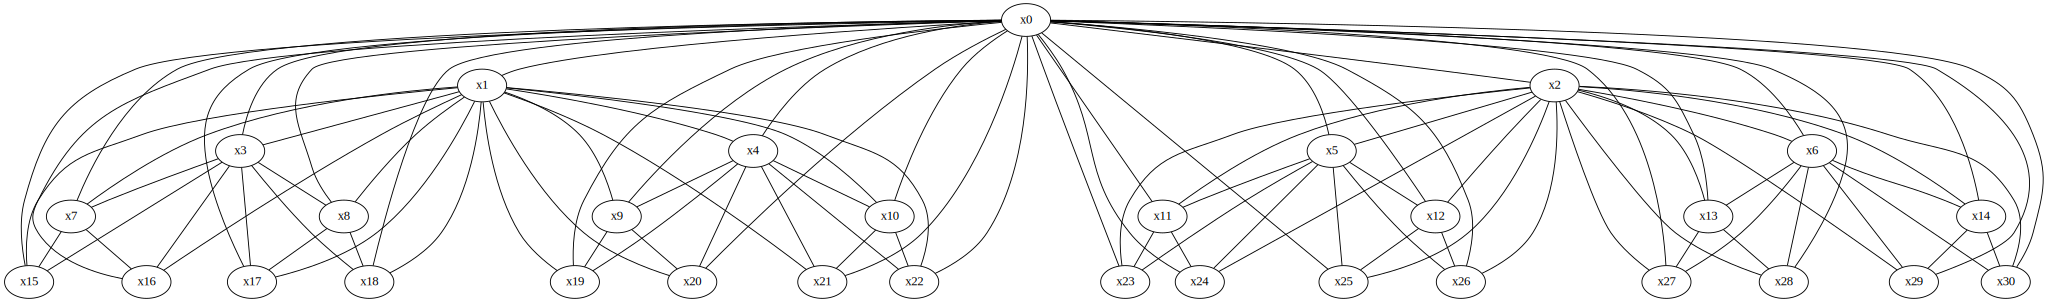

In [28]:
dotinit